<a href="https://colab.research.google.com/github/khanhtran94/LearnConda/blob/master/Nerural_network_to_cassify_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import the dependencies
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets("./data", one_hot = True)

In [0]:
num_training = mnist_data.train.num_examples
num_testing = mnist_data.test.num_examples
num_validation = mnist_data.validation.num_examples
print("MNIST datasize: Traninning samples: {0}, Testing samples: {1}, Validation sample: {2}".format(num_training,num_testing,num_validation))

MNIST datasize: Traninning samples: 55000, Testing samples: 10000, Validation sample: 5000


In [0]:
# network parameter of neural network
n_input = 784 # input image of size 28 x 28
n_hidden_1 = 512 # first hidden layer
n_hidden_2 = 256 # second hidden layer
n_hidden_3 = 128 # third hidden layer
n_output = 10 # output layer having ( 0 - 9 ) digits

In [0]:
# hyperparameterc for nn
learning_rate = 1e-4
epochs = 3000
batch_size = 128
keep_prob = tf.placeholder(tf.float32)

In [0]:
# building tensorflow graph
X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_output])

# wight defination

nn_weight = {"W1": tf.Variable(tf.truncated_normal([n_input, n_hidden_1], stddev = 0.1)),
             "W2": tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2], stddev = 0.1)),
             "W3": tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3], stddev = 0.1)),
             "Wout": tf.Variable(tf.truncated_normal([n_hidden_3, n_output], stddev = 0.1))
            }

Instructions for updating:
Colocations handled automatically by placer.


đây là nơi cấu hình mạng, w1 nhận đầu vào là input,  output là lớp hidden_1, và output của w1, là đầu vào của W2,  ở đây nn của mình có 1 lớp input, 3 lớp ẩn, 1 lớp outout, là Wout, 

chưa hiểu thông số stddev = 0.1 laf ji?


truncated_normal


In [0]:
nn_bias = {"B1": tf.Variable(tf.truncated_normal([n_hidden_1])),
           "B2": tf.Variable(tf.truncated_normal([n_hidden_2])),
           "B3": tf.Variable(tf.truncated_normal([n_hidden_3])),
           "B4": tf.Variable(tf.truncated_normal([n_output])),        
          }

In [0]:
#create a nn model

nn_layer_1 = tf.add(tf.matmul(X, nn_weight["W1"]), nn_bias["B1"])
nn_layer_2 = tf.add(tf.matmul(nn_layer_1, nn_weight["W2"]), nn_bias["B2"])
nn_layer_3 = tf.add(tf.matmul(nn_layer_2, nn_weight["W3"]), nn_bias["B3"])

layer_drop = tf.nn.dropout(nn_layer_3, keep_prob)
output_layer = tf.add(tf.matmul(layer_drop, nn_weight["Wout"]), nn_bias["B4"])

In [0]:
# define the loss
computer_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = output_layer, labels = Y))

#define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(computer_loss)

#define prediction
prediction_out = tf.equal(tf.argmax(output_layer,1), tf.argmax(Y,1))

#define accuracy of the model
nn_accuracy = tf.reduce_mean(tf.cast(prediction_out, tf.float32))

# intialize all the variables
init = tf.global_variables_initializer()

saver = tf.train.Saver()

In [38]:
# executing the computational graph
with tf.Session() as sess:
  sess.run(init)
  
  for i in range(epochs):
    mini_batch_x, mini_batch_y = mnist_data.train.next_batch(batch_size)
    #print(mini_batch_x[0:1,:].shape)
    mini_batch_val_x, mini_batch_val_y = mnist_data.validation.next_batch(batch_size)
    
    sess.run(optimizer, feed_dict = {X: mini_batch_x, Y:mini_batch_y, keep_prob:1})
    
    if i%100 == 0:
      mini_batch_loss, mini_batch_accuracy = sess.run([computer_loss, nn_accuracy], feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob:1})
      mini_batch_val_loss, mini_batch_val_accuracy = sess.run([computer_loss, nn_accuracy], feed_dict = {X: mini_batch_val_x, Y: mini_batch_val_y, keep_prob:1})
      
      print("Iterations: {0}, Train_loss = {1}, Train_accuracy: {2}, val_accuracy {4}".format(i,mini_batch_loss,mini_batch_accuracy,mini_batch_val_loss,mini_batch_val_accuracy))
      
  print("Optimization finished")
  test_accuracy = sess.run(nn_accuracy, feed_dict = {X: mnist_data.test.images, Y: mnist_data.test.labels, keep_prob:1})
  print("Testing accuracy is {0}".format(test_accuracy))
    
  save_path = saver.save(sess, "./model/my_model1.ckpt")

Iterations: 0, Train_loss = 8.13443660736084, Train_accuracy: 0.0546875, val_accuracy 0.078125
Iterations: 100, Train_loss = 3.43949556350708, Train_accuracy: 0.1484375, val_accuracy 0.1328125
Iterations: 200, Train_loss = 2.632503032684326, Train_accuracy: 0.1875, val_accuracy 0.2109375
Iterations: 300, Train_loss = 2.441614866256714, Train_accuracy: 0.234375, val_accuracy 0.2421875
Iterations: 400, Train_loss = 1.9242669343948364, Train_accuracy: 0.3828125, val_accuracy 0.2578125
Iterations: 500, Train_loss = 1.9086661338806152, Train_accuracy: 0.359375, val_accuracy 0.359375
Iterations: 600, Train_loss = 1.7892757654190063, Train_accuracy: 0.3984375, val_accuracy 0.390625
Iterations: 700, Train_loss = 1.5681090354919434, Train_accuracy: 0.46875, val_accuracy 0.4140625
Iterations: 800, Train_loss = 1.7493596076965332, Train_accuracy: 0.4375, val_accuracy 0.484375
Iterations: 900, Train_loss = 1.4515600204467773, Train_accuracy: 0.4765625, val_accuracy 0.5625
Iterations: 1000, Train_l

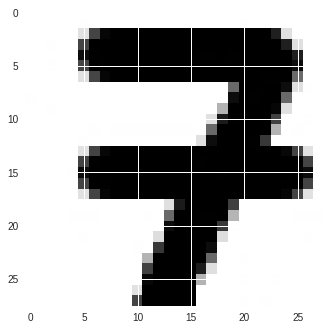

INFO:tensorflow:Restoring parameters from ./model/my_model.ckpt
Prediction for test image is [7]


In [39]:
#upload the test image from outside

img = cv2.imread("77.jpg")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

rescaled_image = cv2.resize(gray_image, (28,28))

plt.imshow(rescaled_image, cmap = 'gray')
plt.show()
rescaled_image.shape

#test_image = rescaled_image.flatten()

dum = rescaled_image.reshape(1,-1)/255
dum.shape

with tf.Session() as sess:
  saver.restore(sess, "./model/my_model.ckpt")
  Z = output_layer.eval(feed_dict={X: dum, keep_prob:1.0})
  y_pred = np.argmax(Z, axis = 1)
  print("Prediction for test image is {0}".format(y_pred))